In [210]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [211]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

sns.set() # seaborn 속성을 기본값으로 설정

파일에서 데이터를 읽어들임

In [212]:
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

#from enum import Enum
class Columns:
    # 원래 존재하는 항목
    PassengerId = "PassengerId"
    Survived = "Survived"
    Pclass = "Pclass"
    Name = "Name"
    Sex = "Sex"
    Age = "Age"
    SibSp = "SibSp"
    Parch = "Parch"
    Ticket = "Ticket"
    Fare = "Fare"
    Cabin = "Cabin"
    Embarked = "Embarked"
    
    # 새로 생성하는 항목
    Title = "Title"
    FareBand = "FareBand"
    Family = "Family"
    Deck = "Deck" # Cabin의 알파벳을 떼서 Deck을 지정한다.

In [213]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


test의 경우 예측에서 제출해야 하는 데이터이기에 Survived 항목이 없다.

In [214]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 입력 데이터 :

- **PassengerId** : 승객 번호<br>
- **Survived** : 생존여부(1: 생존, 0 : 사망)<br>
- **Pclass** : 승선권 클래스(1 : 1st, 2 : 2nd ,3 : 3rd)<br>
- **Name** : 승객 이름<br>
- **Sex** : 승객 성별 (male/female)<br>
- **Age** : 승객 나이(float) <br>
- **SibSp** : 동반한 형제자매, 배우자 수<br>
- **Parch** : 동반한 부모, 자식 수<br>
- **Ticket** : 티켓의 고유 넘버(문자열)<br>
- **Fare** 티켓의 요금(float)<br>
- **Cabin** : 객실 번호<br>
- **Embarked** : 승선한 항구명(C : Cherbourg, Q : Queenstown, S : Southampton)<br>



데이터가 존재하지 않는 feature들을 확인해 본다.

### 데이터 속성 확인

Pclass 에 따른 생존률

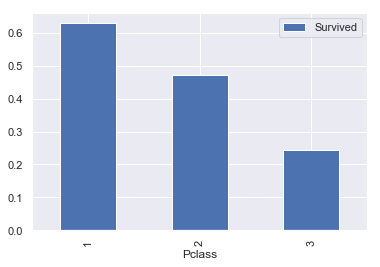

In [215]:
train[[Columns.Pclass, Columns.Survived]].groupby([Columns.Pclass]).mean().plot.bar()

성별에 따른 생존률

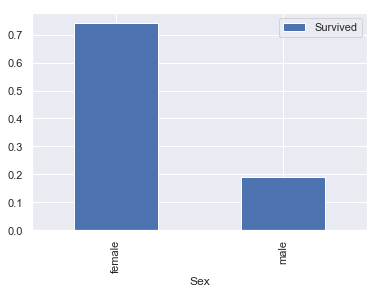

In [216]:
train[[Columns.Sex, Columns.Survived]].groupby([Columns.Sex]).mean().plot.bar()

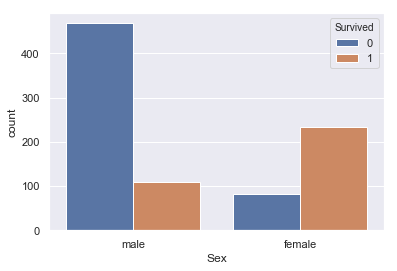

In [217]:
sns.countplot(x=Columns.Sex, hue=Columns.Survived, data=train)

Age에 따른 생존률

일단 Age의 분포는 어떨까?

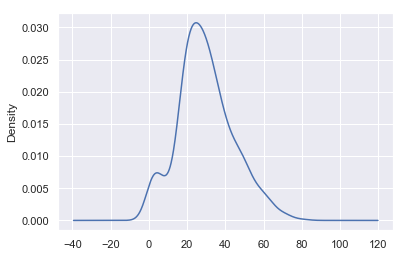

In [218]:
train[Columns.Age].plot.kde()

Age : 0  ~  80
gap: 6
[-1, 0, 6, 12, 18, 24, 30, 36, 42, 48, 54, 60, 66, inf]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


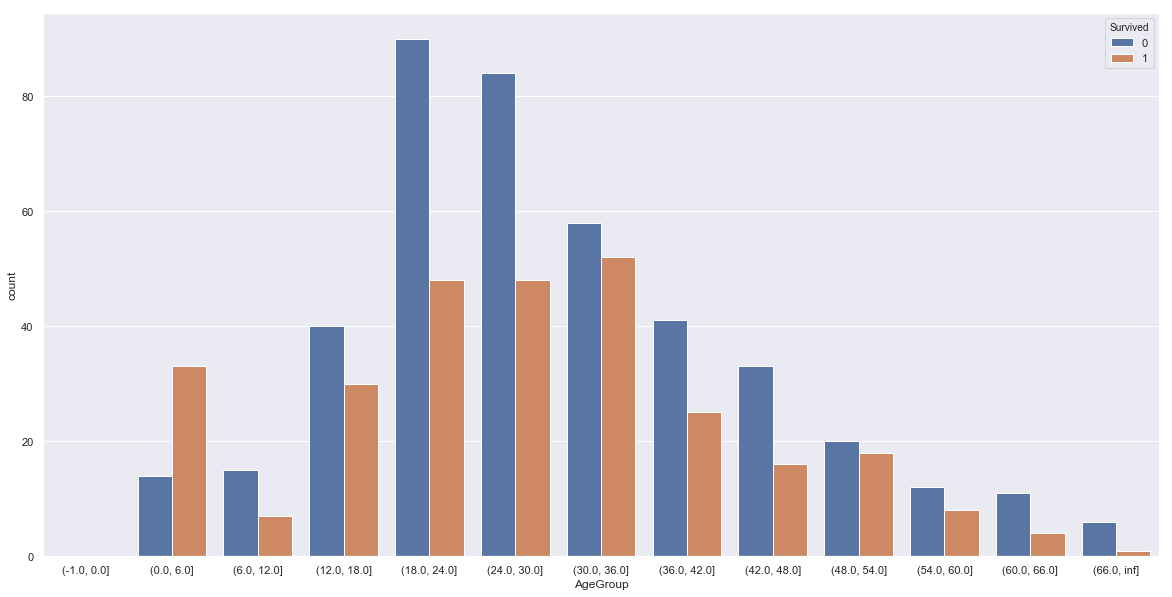

In [219]:
df = train[train[Columns.Age].isnull() == False]
#df.describe()

# 나이대로 나누어서 출력해 본다.
age_min = df[Columns.Age].min().astype('int')
age_max = df[Columns.Age].max().astype('int')
print("Age :", age_min, " ~ ", age_max)
gap = ((age_max - age_min) / 12).astype(int)
print('gap:', gap)

bins = [-1]
for i in range(12):
    bins.append(i * gap)
bins.append(np.inf)
print(bins)

_df = df
_df['AgeGroup'] = pd.cut(_df[Columns.Age], bins)
fig, ax = plt.subplots(figsize=(20, 10))
sns.countplot('AgeGroup', hue=Columns.Survived, data=_df, ax=ax)

Pclass/Age에 따른 생존률 변화량

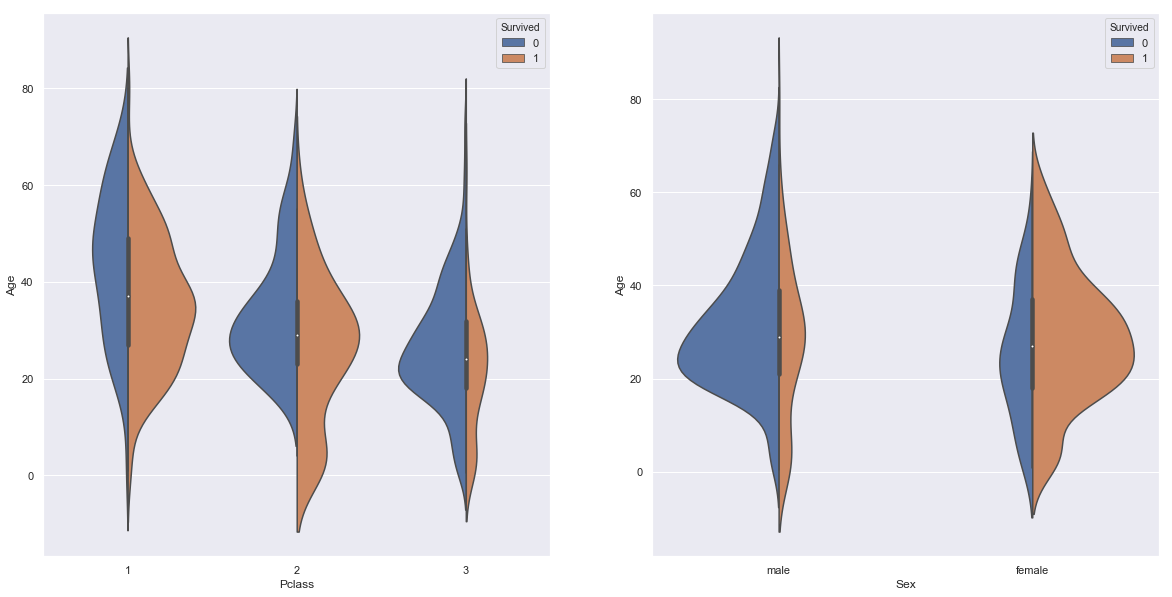

In [220]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
sns.violinplot(Columns.Pclass, Columns.Age, hue=Columns.Survived, data=train, scale='count', split=True, ax=ax[0])
sns.violinplot(Columns.Sex, Columns.Age, hue=Columns.Survived, data=train, scale='count', split=True, ax=ax[1])

In [221]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

가족 수 ( Parch + SibSp + 1(자기자신))과 생존률을 비교해 본다.

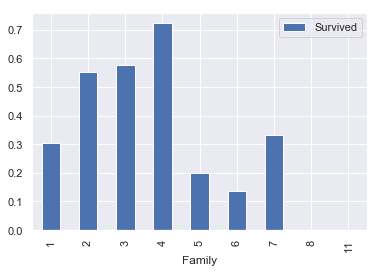

In [222]:
_train = train
_train['Family'] = _train[Columns.SibSp] + _train[Columns.Parch] + 1
_train[['Family', Columns.Survived]].groupby('Family').mean().plot.bar()

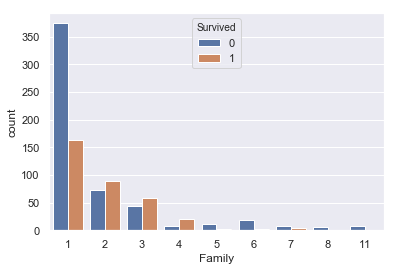

In [223]:
sns.countplot(x='Family', hue=Columns.Survived, data=_train)

### 데이터 가공

1. 비어있는 데이터(null)을 처리한다.<br>

###### 기존 feature들을 보완/가공
**Age** : null이 많고 나이가 중요할 것으로 판단되니 데이터를 채워야 할 필요가 있다.<br>
**Cabin** : null이 너무 많다.<br>
**Embarked** : null이 거의 없으므로 중요하지 않은 값으로 채워도 문제가 없어 보임<br>
**Parse, SibSp** : 합쳐서 Family로 만들고 삭제하자.

###### 새로운 feature를 추가
**Family** : Parch + SibSp + 1(자기자신)

In [224]:
# Cabin의 경우 null이 너무 많으므로 삭제한다.
# if Columns.Cabin in train:
#     train = train.drop([Columns.Cabin], axis = 1)
# if Columns.Cabin in test:
#     test = test.drop([Columns.Cabin], axis = 1)

In [225]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


Parch와 SibSp를 Family로 변경한다.

In [226]:
train[Columns.Family] = train[Columns.Parch] + train[Columns.SibSp] + 1
test[Columns.Family] = test[Columns.Parch] + test[Columns.SibSp] + 1
train.drop([Columns.Parch, Columns.SibSp], axis=1)
test.drop([Columns.Parch, Columns.SibSp], axis=1)

,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family
0,892,3,"Kelly, Mr. James",male,34.5,330911,7.8292,NaN,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,240276,9.6875,NaN,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,315154,8.6625,NaN,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,3101298,12.2875,NaN,S,3
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,7538,9.2250,NaN,S,1
6,898,3,"Connolly, Miss. Kate",female,30.0,330972,7.6292,NaN,Q,1
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,248738,29.0000,NaN,S,3
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,2657,7.2292,NaN,C,1
9,901,3,"Davies, Mr. John Samuel",male,21.0,A/4 48871,24.1500,NaN,S,3


Embarked 정리

In [227]:
merged = train.append(test)
most_embarked_label = merged[Columns.Embarked].value_counts().index[0]

train = train.fillna({Columns.Embarked : most_embarked_label})
test = test.fillna({Columns.Embarked : most_embarked_label})
train.describe(include="all")

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,891,891.000000
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3,NaN
top,NaN,NaN,NaN,"Foo, Mr. Choong",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S,NaN
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,646,NaN
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN,1.904602
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN,1.613459
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN,1.000000
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN,1.000000
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,1.000000
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN,2.000000


In [228]:
test.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418,418.000000
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3,NaN
top,NaN,NaN,"Cacic, Miss. Manda",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S,NaN
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270,NaN
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN,1.839713
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN,1.519072
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN,1.000000
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,1.000000
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,1.000000
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN,2.000000


In [229]:
mapping = pd.Series([1,2,3], ['S', 'C', 'Q'])
train[Columns.Embarked] = train[Columns.Embarked].map(mapping)
test[Columns.Embarked] = test[Columns.Embarked].map(mapping)

# float로 변경:
train[Columns.Embarked] = train[Columns.Embarked].astype('float')
test[Columns.Embarked] = test[Columns.Embarked].astype('float')

In [230]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,891.000000,891.000000
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,NaN,NaN
top,NaN,NaN,NaN,"Foo, Mr. Choong",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,NaN,NaN
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,NaN,NaN
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,1.361392,1.904602
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,0.635673,1.613459
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,1.000000,1.000000
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,1.000000,1.000000
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,1.000000,1.000000
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,2.000000,2.000000


In [231]:
test.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418.000000,418.000000
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,NaN,NaN
top,NaN,NaN,"Cacic, Miss. Manda",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,NaN,NaN
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,NaN,NaN
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,1.464115,1.839713
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,0.685516,1.519072
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,1.000000,1.000000
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,1.000000,1.000000
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,1.000000,1.000000
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,2.000000,2.000000


Name에서 호칭을 추출해서 새 항목(Title)을 추가하고 숫자값으로 변환한다.
Name은 지운다.

In [232]:
combine = [train, test]
for ds in combine:
    # 이름을 추출
    ds[Columns.Title] = ds.Name.str.extract('([A-Za-z]+)\. ', expand=False) # expand:True면 DataFrame을, False면 Series를 리턴한다.

# 정리
for dataset in combine:
    dataset[Columns.Title] = dataset[Columns.Title].replace(['Lady', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    dataset[Columns.Title] = dataset[Columns.Title].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset[Columns.Title] = dataset[Columns.Title].replace(['Mlle'], 'Miss')
    dataset[Columns.Title] = dataset[Columns.Title].replace(['Ms'], 'Miss')
    dataset[Columns.Title] = dataset[Columns.Title].replace(['Mme'], 'Mrs')
    
print(train[[Columns.Title, Columns.Survived]].groupby(Columns.Title).mean())

idxs = train[Columns.Title].value_counts().index # 많은 순서대로 정렬해서 오름차순으로 값을 매김
print(idxs)
mapping = {}
for i in range(len(idxs)):
    mapping[idxs[i]] = i + 1
print(mapping)

for ds in combine:
    ds[Columns.Title] = ds[Columns.Title].map(mapping)

print(train[Columns.Title].value_counts().index)
print(test[Columns.Title].value_counts().index)

if Columns.Name in train:
    train = train.drop([Columns.Name], axis=1)
    
if Columns.Name in test:
    test = test.drop([Columns.Name], axis=1)
    
train.describe(include='all')

        Survived
Title           
Master  0.575000
Miss    0.702703
Mr      0.156673
Mrs     0.793651
Rare    0.285714
Royal   1.000000
Index(['Mr', 'Miss', 'Mrs', 'Master', 'Rare', 'Royal'], dtype='object')
{'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Rare': 5, 'Royal': 6}
Int64Index([1, 2, 3, 4, 5, 6], dtype='int64')
Int64Index([1, 2, 3, 4, 5], dtype='int64')


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Title
count,891.000000,891.000000,891.000000,891,714.000000,891.000000,891.000000,891,891.000000,204,891.000000,891.000000,891.000000
unique,NaN,NaN,NaN,2,NaN,NaN,NaN,681,NaN,147,NaN,NaN,NaN
top,NaN,NaN,NaN,male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,NaN,NaN,NaN
freq,NaN,NaN,NaN,577,NaN,NaN,NaN,7,NaN,4,NaN,NaN,NaN
mean,446.000000,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,1.361392,1.904602,1.730640
std,257.353842,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,0.635673,1.613459,1.038232
min,1.000000,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,1.000000,1.000000,1.000000
25%,223.500000,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,1.000000,1.000000,1.000000
50%,446.000000,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,1.000000,1.000000,1.000000
75%,668.500000,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,2.000000,2.000000,2.000000


Sex 항목을 숫자로 변경

In [233]:
mapping = {'male':0, 'female':1}
train[Columns.Sex] = train[Columns.Sex].map(mapping)
test[Columns.Sex] = test[Columns.Sex].map(mapping)

In [234]:
train.head(n=50)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,1.0,2,1
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,2.0,2,3
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0,1,2
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,1.0,2,3
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,1.0,1,1
5,6,0,3,0,NaN,0,0,330877,8.4583,NaN,3.0,1,1
6,7,0,1,0,54.0,0,0,17463,51.8625,E46,1.0,1,1
7,8,0,3,0,2.0,3,1,349909,21.0750,NaN,1.0,5,4
8,9,1,3,1,27.0,0,2,347742,11.1333,NaN,1.0,3,3
9,10,1,2,1,14.0,1,0,237736,30.0708,NaN,2.0,2,3


In [235]:
test.head(n=50)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Title
0,892,3,0,34.5,0,0,330911,7.8292,NaN,3.0,1,1
1,893,3,1,47.0,1,0,363272,7.0000,NaN,1.0,2,3
2,894,2,0,62.0,0,0,240276,9.6875,NaN,3.0,1,1
3,895,3,0,27.0,0,0,315154,8.6625,NaN,1.0,1,1
4,896,3,1,22.0,1,1,3101298,12.2875,NaN,1.0,3,3
5,897,3,0,14.0,0,0,7538,9.2250,NaN,1.0,1,1
6,898,3,1,30.0,0,0,330972,7.6292,NaN,3.0,1,2
7,899,2,0,26.0,1,1,248738,29.0000,NaN,1.0,3,1
8,900,3,1,18.0,0,0,2657,7.2292,NaN,2.0,1,3
9,901,3,0,21.0,2,0,A/4 48871,24.1500,NaN,1.0,3,1


비어있는 Age를 처리

In [236]:
# {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Rare': 5, 'Royal': 6}

mapping = {1:21, 2:21, 3:24, 4:40, 5:50, 6:60}
def guess_age(row):
    return mapping[row[Columns.Title]]

def fixup_age(df):
    for idx, row in df[df[Columns.Age].isnull() == True].iterrows():
        df.loc[idx, Columns.Age] = guess_age(row)
    return df
    
train = fixup_age(train)
train.describe(include='all')

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Title
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891,891.000000,204,891.000000,891.000000,891.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,681,NaN,147,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN,4,NaN,NaN,NaN
mean,446.000000,0.383838,2.308642,0.352413,28.146094,0.523008,0.381594,NaN,32.204208,NaN,1.361392,1.904602,1.730640
std,257.353842,0.486592,0.836071,0.477990,13.467645,1.102743,0.806057,NaN,49.693429,NaN,0.635673,1.613459,1.038232
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,NaN,0.000000,NaN,1.000000,1.000000,1.000000
25%,223.500000,0.000000,2.000000,0.000000,21.000000,0.000000,0.000000,NaN,7.910400,NaN,1.000000,1.000000,1.000000
50%,446.000000,0.000000,3.000000,0.000000,24.000000,0.000000,0.000000,NaN,14.454200,NaN,1.000000,1.000000,1.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,NaN,31.000000,NaN,2.000000,2.000000,2.000000


In [237]:
test = fixup_age(test)
test.describe(include='all')

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Title
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418,417.000000,91,418.000000,418.000000,418.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,363,NaN,76,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,3,NaN,NaN,NaN
mean,1100.500000,2.265550,0.363636,28.618421,0.447368,0.392344,NaN,35.627188,NaN,1.464115,1.839713,1.741627
std,120.810458,0.841838,0.481622,13.175182,0.896760,0.981429,NaN,55.907576,NaN,0.685516,1.519072,1.006091
min,892.000000,1.000000,0.000000,0.170000,0.000000,0.000000,NaN,0.000000,NaN,1.000000,1.000000,1.000000
25%,996.250000,1.000000,0.000000,21.000000,0.000000,0.000000,NaN,7.895800,NaN,1.000000,1.000000,1.000000
50%,1100.500000,3.000000,0.000000,24.000000,0.000000,0.000000,NaN,14.454200,NaN,1.000000,1.000000,1.000000
75%,1204.750000,3.000000,1.000000,36.000000,1.000000,0.000000,NaN,31.500000,NaN,2.000000,2.000000,2.000000


### Ticket 항목을 분석

In [238]:
train[Columns.Ticket].unique().shape

(681,)

ticket 항목 중 중복되는 것이 있다는 것을 알 수 있다.
중복되는 항목들의 Fare를 찾아보면 모두 같다.
===> ticket이 중복되었다고 돈을 나눠야 할 이유는 없을지도...

No Cabin Fare: 19.1573253275109
Cabin Fare: 76.14150392156861


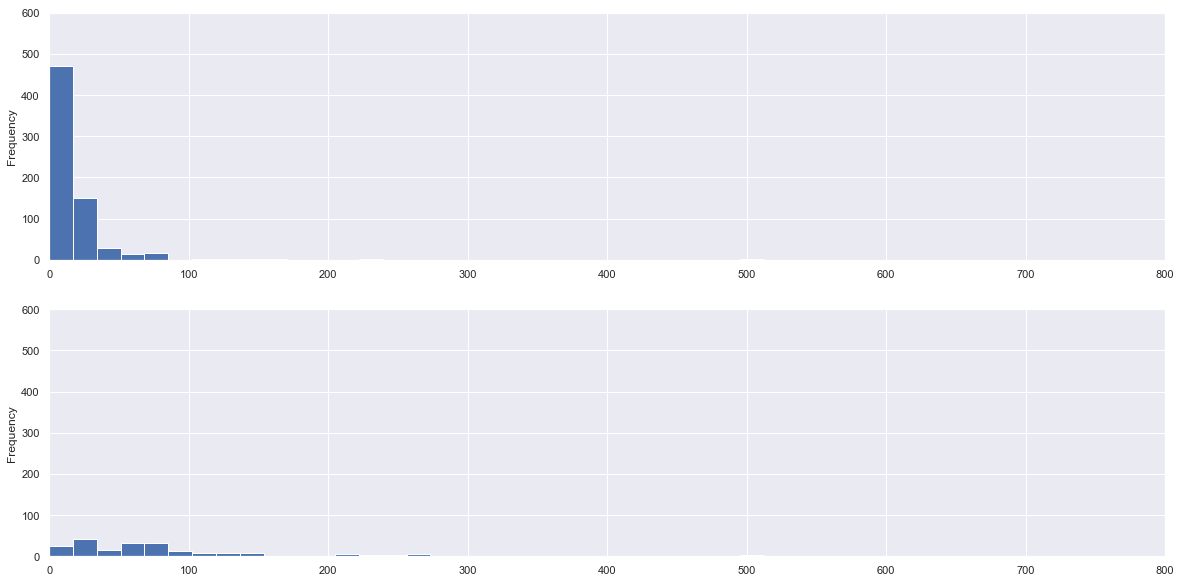

In [240]:
tickets = train[Columns.Ticket]

df = train

# 중복되는 ticket을 가진 사람들의 fare는? => 같다.
def show_shared_tickets(df):
    for ticket in tickets:
        if df[df[Columns.Ticket] == ticket].shape[0] > 1:
            print("\nTicket:", ticket)
            print(df[df[Columns.Ticket] == ticket][Columns.Fare], df[df[Columns.Ticket] == ticket][Columns.Cabin], \
                  df[df[Columns.Ticket] == ticket][Columns.Embarked])
    

# def divide_fare_by_shared_tickets(df):
#     for ticket in tickets:
#         tmpdf = df[df[Columns.Ticket] == ticket]
#         if df[df[Columns.Ticket] == ticket].shape[0] > 1:
#             total_fare = df[df[Columns.Ticket] == ticket][Columns.Fare].value_counts().index[0]            
#             per_people = df[df[Columns.Ticket] == ticket].shape[0]            
#             df[df[Columns.Ticket] == ticket][Columns.Fare] = total_fare / per_people
#     return df
            
# df = divide_fare_by_shared_tickets(df)


#cabin / fare
#non-cabin / fare

# cabin이 있고/없고에 따라 fare를 그래프로 그려보았다.
fig, ax = plt.subplots(2, 1, figsize=(20, 10))
ax[0].set_xlim([0, 800])
ax[1].set_xlim([0, 800])
ax[0].set_ylim([0, 600])
ax[1].set_ylim([0, 600])
df = df[df[Columns.Cabin].isnull()]
df[Columns.Fare].plot.hist(ax=ax[0], bins=30)
print("No Cabin Fare:", df[Columns.Fare].mean())

df = train[train[Columns.Cabin].isnull() == False]
df[Columns.Fare].plot.hist(ax=ax[1], bins=30)
print("Cabin Fare:", df[Columns.Fare].mean())



Index(['G', 'F', 'A', 'T', 'E', 'D', 'C', 'B'], dtype='object', name='Deck')
deck= 1
deck= 3
deck= 2
deck= 7
deck= 6
deck= 8
deck= 5


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Title,Deck
0,1,0,3,0,22.00,1,0,A/5 21171,7.2500,NaN,1.0,2,1,1
1,2,1,1,1,38.00,1,0,PC 17599,71.2833,C85,2.0,2,3,7
2,3,1,3,1,26.00,0,0,STON/O2. 3101282,7.9250,NaN,1.0,1,2,1
3,4,1,1,1,35.00,1,0,113803,53.1000,C123,1.0,2,3,7
4,5,0,3,0,35.00,0,0,373450,8.0500,NaN,1.0,1,1,1
5,6,0,3,0,21.00,0,0,330877,8.4583,NaN,3.0,1,1,1
6,7,0,1,0,54.00,0,0,17463,51.8625,E46,1.0,1,1,5
7,8,0,3,0,2.00,3,1,349909,21.0750,NaN,1.0,5,4,2
8,9,1,3,1,27.00,0,2,347742,11.1333,NaN,1.0,3,3,1
9,10,1,2,1,14.00,1,0,237736,30.0708,NaN,2.0,2,3,3


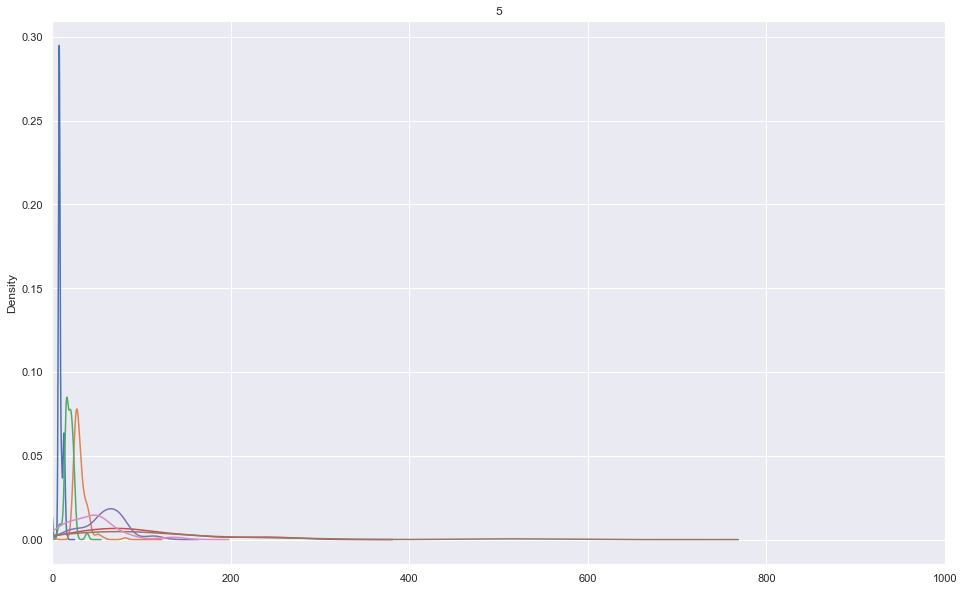

In [241]:
tickets = train[Columns.Ticket]

# 중복되는 ticket을 가진 사람들의 cabin은?
# ==> 같은 ticket을 가진 사람들 중 cabin값이 비어 있으면 다른 사람들의 cabin값으로 채운다.
def fixup_cabin_by_ticket(df):
    tickets = df[Columns.Ticket].unique()
    # cabin이 null이면 ticket이 같은걸 찾아서 cabin값을 가져온다.
    for idx, row in df[df[Columns.Cabin].isnull() == True].iterrows():
        df2 = df.loc[idx, Columns.Ticket]
        cabin = df[df[Columns.Ticket] == df2][Columns.Cabin].value_counts().index
        if len(cabin) > 0:
            df.loc[idx, Columns.Cabin] = cabin[0]
            
    # 검증단계:
    for ticket in tickets:
        if df[df[Columns.Ticket] == ticket].shape[0] > 1:
            # 다 null이거나 다 null이 아니건나 해야 한다.
            #if df[df[Columns.Ticket] == ticket][df[Columns.Cabin].isnull() == True].shape[0] != 0 and df[df[Columns.Ticket] == ticket][df[Columns.Cabin].isnull() == False].shape[0] != 0:
            '''
            아래 나누어서 한 이유는 : 
            아래와 같이 하게 되면,
            if df[df[Columns.Ticket] == ticket][df[Columns.Cabin].isnull() == True].shape[0] != 0 and df[df[Columns.Ticket] == ticket][df[Columns.Cabin].isnull() == False].shape[0] != 0:
            df[df[Columns.Ticket] == ticket]과 [df[Columns.Cabin].isnull() == True]의 크기가 달라져서,
            
                UserWarning: Boolean Series key will be reindexed to match DataFrame index.
            
            위와 같은 에러가 발생하기 때문이다.
            Pandas가 자동으로 index를 기준으로 boolean vector를 reindex해서 맞춰 주지만, implicit한 동작이어서 나중에 변경될 수 있으므로 warning으로 알려주는 것이다.
            다름 링크 내용을 참고한다.
            https://stackoverflow.com/questions/41710789/boolean-series-key-will-be-reindexed-to-match-dataframe-index
            
            '''
            df2 = df[df[Columns.Ticket] == ticket]
            if df2[df2[Columns.Cabin].isnull() == True].shape[0] != 0 and df2[df2[Columns.Cabin].isnull() == False].shape[0] != 0:\
                print('Wrong!')
    return df

train = fixup_cabin_by_ticket(train)
        
#train['TicketNumber'] = train[Columns.Ticket].str.extract('([0-9][0-9]+)', expand=True)
#train.head(n=train.shape[0])


#train[train['TicketNumber'].isnull()]
#train['TicketNumber'] = train['TicketNumber'].fillna(0)
# train.describe(include='all')

# Cabin에 대한 요금은?
# for i, row in train[train[Columns.Cabin].isnull() == False].iterrows():
#     cabin_grade = row.str.extract('([A-Za-z]+)', expand=False)
    #print(type(cabin_grade))
    #print("cabin grade", cabin_grade[Columns.Cabin])
    
#train.loc[train[Columns.Cabin].isnull() == False].Cabin.str.extract('([A-Za-z]+)', expand=False)

def make_deck(df):
    '''
    Cabin에서 알파벳을 떼서 Deck 알파벳을 생성한다.
    '''
    df[Columns.Deck] = df[Columns.Cabin].str.extract('([A-Za-z]+)', expand=True)
    return df

train = make_deck(train)
train.describe(include='all')

#df[[Columns.Deck, Columns.Fare]].groupby([Columns.Deck]).mean().plot.bar()  # Deck에 따른 요금제

'''
Deck            
G      13.581250
F      18.958329
T      35.500000
A      39.623887
E      44.950127
D      57.244576
C     106.152051
B     121.814585
'''
def guess_deck_by_fare(fare):
    if fare < 15.0:
        return 'G'
    elif fare  < 25.0:
        return 'F'
    elif fare < 42.0:
        return 'A'
    elif fare < 50.0:
        return 'E'
    elif fare < 70.0:
        return 'D'
    elif fare < 110.0:
        return 'C'
    else:
        return 'B'

def fill_empty_decks(df):
    '''
    비어있는 Deck을 Fare값으로 추정해서 채운다.
    '''
    for idx, row in df[df[Columns.Deck].isnull() == True].iterrows():
        df.loc[idx, Columns.Deck] = guess_deck_by_fare(row[Columns.Fare])
    return df

train = fill_empty_decks(train)

# Cabin을 숫자로 변경한다.
def cabin_as_number(df):
    mean_values = df[[Columns.Deck, Columns.Fare]].groupby([Columns.Deck]).mean().sort_values(by=[Columns.Fare])
    print(mean_values.index)
    mapping = {}
    for i in range(mean_values.shape[0]):
        #print("mean_value=", mean_values[Columns.Deck])
        mapping[mean_values.index[i]] = i + 1
    df[Columns.Deck] = df[Columns.Deck].map(mapping)
    return df

train = cabin_as_number(train)

    
'''
Deck 마다 Fare의 분포를 그래프로 그려서 확인한다.
'''
decks = train[Columns.Deck].value_counts().index
#print(decks.shape)
fig, ax = plt.subplots(1, 1, figsize=(16, 10))
for i in range(decks.shape[0]-1):
    print("deck=", decks[i])
    #df[df[Columns.Deck] == decks[i]][Columns.Fare].plot.hist(ax=ax[i])
    ax.set_xlim([0, 1000])
    ax.set_title(decks[i])
    values = train[train[Columns.Deck] == decks[i]][Columns.Fare]
    values.plot(kind='kde', ax=ax, use_index=True)
    #ax[i].plot(values)


train.head(n=100)




#df[df[Columns.Deck].isnull() == False][[Columns.Deck, Columns.Fare]].groupby([Columns.Deck]).mean().plot.bar()
#train[Columns.Age].plot.kde()

#df[df[Columns.Deck].isnull()][Columns.Fare].plot.kde()
#df[df[Columns.Deck].isnull()].shape
#df[df[Columns.Deck].isnull()].head()



# Deck과 Survived의 상관관계를 확인하자.
#sns.countplot(x=Columns.Deck, hue=Columns.Survived, data=df)

# df = df[df['CabinGrade'].isnull() == True]
# df[Columns.Survived].mean()

# df = df[df['CabinGrade'].isnull() == False]
# df[Columns.Survived].mean()



# 중복되는 ticket을 가진 사람들의 cabin은?
# tickets = train[Columns.Ticket].unique()
# for ticket in tickets:
#     if train[train[Columns.Ticket] == ticket].shape[0] > 1:
#         pass

        

Fare(요금) 항목의 분포를 check해 보자.

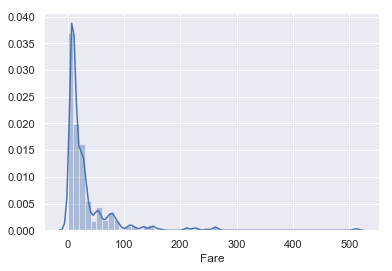

In [103]:
sns.distplot(train[Columns.Fare])

보시다시피, distribution이 매우 비대칭인 것을 알 수 있습니다.(high skewness). <br>
만약 이대로 모델에 넣어준다면 자칫 모델이 잘못 학습할 수도 있습니다. <br>
몇개 없는 outlier 에 대해서 너무 민감하게 반응한다면, 실제 예측 시에 좋지 못한 결과를 부를 수 있습니다.<br>
outlier의 영향을 줄이기 위해 Fare 에 log 를 취하겠습니다.

In [104]:
train[Columns.Fare] = train[Columns.Fare].map(lambda i : np.log(i) if i > 0 else 0)
test[Columns.Fare] = test[Columns.Fare].map(lambda i : np.log(i) if i > 0 else 0)

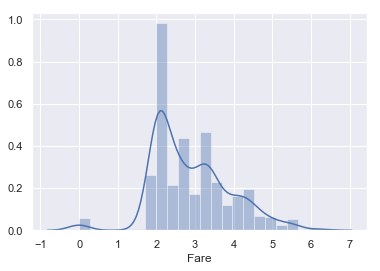

In [105]:
sns.distplot(train[Columns.Fare])

In [106]:
train.head(n=50)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Title,TicketNumber,Deck
0,1,0,3,0,22.0,1,0,A/5 21171,1.981001,NaN,1.0,2,1,21171,G
1,2,1,1,1,38.0,1,0,PC 17599,4.266662,C85,2.0,2,3,17599,C
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,2.070022,NaN,1.0,1,2,3101282,G
3,4,1,1,1,35.0,1,0,113803,3.972177,C123,1.0,2,3,113803,C
4,5,0,3,0,35.0,0,0,373450,2.085672,NaN,1.0,1,1,373450,G
5,6,0,3,0,21.0,0,0,330877,2.135148,NaN,3.0,1,1,330877,G
6,7,0,1,0,54.0,0,0,17463,3.948596,E46,1.0,1,1,17463,E
7,8,0,3,0,2.0,3,1,349909,3.048088,NaN,1.0,5,4,349909,F
8,9,1,3,1,27.0,0,2,347742,2.409941,NaN,1.0,3,3,347742,G
9,10,1,2,1,14.0,1,0,237736,3.403555,NaN,2.0,2,3,237736,A
